In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error

In [2]:
# Multilayer Perceptron
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import concatenate
from tensorflow.keras import optimizers
from tensorflow.keras import backend
from keras.layers import LeakyReLU, PReLU
from tensorflow.keras.metrics import categorical_accuracy

In [3]:
df_m = pd.read_csv('https://raw.githubusercontent.com/simsekergun/Resolution/main/Es_measured_varying_length.csv',header=None)
df_r = pd.read_csv('https://raw.githubusercontent.com/simsekergun/Resolution/main/Es_true_varying_length.csv',header=None)
df_m = df_m.fillna(0)
df_r = df_r.fillna(0)
df_m.shape, df_r.shape

((2330, 200), (2330, 400))

In [4]:
nan_count = df_r.isna().sum()
print(nan_count)

0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Length: 400, dtype: int64


In [5]:
df_mmax = max(df_m.max())
df_rmax = max(df_r.max())

In [6]:
X = df_m/df_mmax
y = df_r/df_rmax

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
X_train.shape, X_test.shape, y_train.shape

((1631, 200), (699, 200), (1631, 400))

In [8]:
Ns = [50, 100, 150, 200, 250, 300, 400, 500, 800, 1000, 1300, 1631]

In [9]:
def get_mean_error(y_pred, y_test):
  errors = np.zeros(len(y_pred))
  for ii in np.arange(len(y_pred)):
    yt = y_test.iloc[ii,:]
    yp = y_pred[ii,:]
    err = yt-yp
    errors[i]=err.abs().max()/yt.max()
  return errors.mean()  

In [10]:
# ANN parameters
ac = 'ReLU'  # activation function
nnno = 512    # number of neurons
dr_rate = 0.1  # dropout rate
EPOCHS = 200    # number of epocs
LR = 0.001     # learning rate

In [11]:
#X_train, X_test, y_train, y_test
mean_errors = np.zeros(len(Ns))
for i in range(len(Ns)):
  ninput=200
  noutput=400
  visible = Input(shape=(ninput,))
  hidden1 = Dense(nnno, activation=ac)(visible)
  hidden1 = Dropout(dr_rate)(hidden1)
  hidden2 = Dense(nnno, activation=ac)(hidden1)
  hidden2 = Dropout(dr_rate)(hidden2)
  hidden3 = Dense(nnno, activation=ac)(hidden2)
  hidden3 = Dropout(dr_rate)(hidden3)
  hidden4 = Dense(nnno, activation=ac)(hidden3)
  hidden4 = Dropout(dr_rate)(hidden4)
  predicted_value = Dense(noutput)(hidden4)
  modelANN = Model(inputs=visible, outputs=predicted_value)
  opt = optimizers.Adamax(learning_rate=LR)    
  modelANN.compile(optimizer=opt, loss=['mse'])
  history = modelANN.fit(X_train[:Ns[i]], y_train[:Ns[i]],epochs=EPOCHS, validation_data = (X_test,y_test), verbose=0)
  y_pred = modelANN.predict(X_test)
  mean_errors[i] = mean_squared_error(y_pred, y_test)
  del modelANN

22/22 [==============================] - 0s 2ms/step


In [12]:
y_test

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
1089,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
245,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1548,0.0,0.0,0.0,1.146852e-08,1.169281e-08,1.191709e-08,1.214138e-08,1.236567e-08,1.978175e-06,3.944069e-06,...,1.517473e-09,1.517495e-09,1.517473e-09,1.517473e-09,1.517473e-09,1.517473e-09,1.517473e-09,1.517473e-09,1.517473e-09,1.517495e-09
215,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1167,0.0,0.0,0.0,0.000000e+00,0.000000e+00,8.057483e-09,7.611927e-09,7.166372e-09,6.720817e-09,6.378463e-06,...,1.296182e-09,1.296182e-09,1.296182e-09,1.296182e-09,1.296182e-09,1.296182e-09,1.296204e-09,1.296204e-09,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,0.0,0.0,0.0,0.000000e+00,1.085168e-08,1.081764e-08,1.078338e-08,1.074934e-08,1.071552e-08,1.068471e-08,...,6.706382e-09,6.706382e-09,6.706382e-09,6.706382e-09,6.706382e-09,6.706382e-09,6.706382e-09,6.706382e-09,6.706382e-09,0.000000e+00
1967,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.624811e-08,1.624811e-08,1.624811e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1150,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1544,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


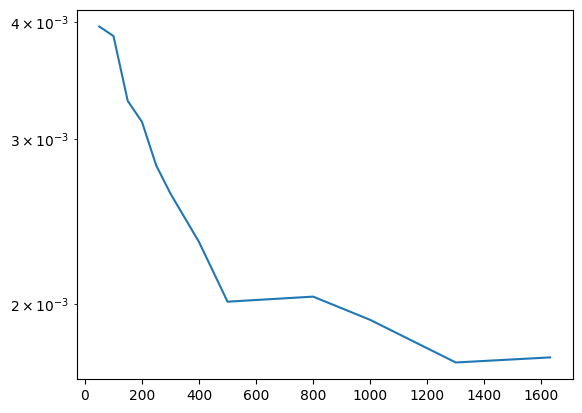

In [13]:
plt.plot(Ns,mean_errors)
plt.yscale("log")
plt.show()

In [14]:
df_y_pred = pd.DataFrame(y_pred)

In [15]:
#from google.colab import files
#df_errors = pd.DataFrame(max_errors)
#df_errors.to_csv('FCNN_df_errors.csv')

In [16]:
mean_errors

array([0.00395954, 0.0038673 , 0.0032967 , 0.00313014, 0.00281132,
       0.00262334, 0.00232881, 0.0020107 , 0.00203597, 0.00192288,
       0.00173123, 0.00175299])